<h1 style="text-align: center;"> 3. Regresión logística </h1>
<br>
La regresión logística es similar a la regresión (lineal), pero adaptada para fines de clasificación. La diferencia es pequeña; para la Regresión logística también tenemos que aplicar iterativamente el método de descenso de gradiente para estimar los valores del parámetro $ \theta $. Y nuevamente, durante la iteración, los valores se estiman tomando el gradiente de la función de costo. Y también, la función de costo viene dada por el error al cuadrado de la diferencia entre la función de hipótesis $ h _{\theta} (x) $ y $ Y $. Sin embargo, la principal diferencia es la función de hipótesis en sí.

Para comprender la función de hipótesis de la regresión logística, primero debemos comprender la idea detrás de la clasificación.

Cuando desee clasificar algo, hay un número limitado de clases a las que puede pertenecer. Y para cada una de estas posibles clases, solo puede haber dos estados para $ y ^ {(i)} $;
o $ y ^ {(i)} $ pertenece a la clase especificada y $ y = 1 $, o no pertenece a la clase y $ y = 0 $. Aunque los valores de salida $ Y $ son binarios, las variables independientes $ X $ siguen siendo continuas. Entonces, necesitamos una función que tenga como entrada un gran conjunto de variables continuas $ X $ y para cada una de estas variables produzca una salida binaria. Esta función, la función de hipótesis, tiene la siguiente forma:

$ h_{\theta} = \frac{1}{1 + \exp(-z)} = \frac{1}{1 + \exp(-\theta x)} $.

Esta función también se conoce como función logística, que forma parte de la familia de la función sigmoidea. Estas funciones se utilizan ampliamente en las ciencias naturales porque proporcionan el modelo más simple para el crecimiento de la población. Sin embargo, la razón por la que la función logística se utiliza para la clasificación en Machine Learning es su 'forma de S'.

<img src="img/Logistic-curve.svg_-350x233.png"/>

Como puede ver, esta función está limitada en la dirección y por 0 y 1. Si la variable $ z $ es muy negativa, la función de salida irá a cero (no pertenece a la clase). Si la variable $ z $ es muy positiva, la salida será uno y pertenece a la clase.
(Esta función se denomina función indicadora).

La pregunta entonces es, ¿qué pasará con los valores de entrada que no son ni muy positivos ni muy negativos, sino en algún lugar "en el medio"? Tenemos que definir un límite de decisión, que separa la clase positiva de la negativa. Por lo general, este límite de decisión se elige en el medio de la función logística, es decir, en $ z = 0 $ donde el valor de salida $ y $ es $ 0.5 $.

\begin{equation}
y =\begin{cases}
1, \text{si $z \gt  0 $}.\\
0, \text{si $z \lt 0 $}.
\end{cases}
\end{equation}

Como podemos ver en la fórmula de la función logística, $ z = \theta \cdot x $. Es decir, el parámetro dependiente $ \theta $ (también conocido como la característica), asigna la variable de entrada $ x $ a una posición en el eje $ z $. Con su valor $ z $, podemos usar la función logística para calcular el valor $ y $. Si este $ y $ -valor $ \gt 0.5 $ asumimos que pertenece a esta clase y viceversa.

Entonces, la característica $ \theta $ debe elegirse de manera que prediga la pertenencia a la clase correctamente. Por tanto, es fundamental saber qué características son útiles para la tarea de clasificación. Una vez que se  seleccionan las funciones adecuadas, se puede utilizar el descenso de gradiente para encontrar el valor óptimo de estas funciones.

¿Cómo podemos hacer un descenso de gradientes con esta función logística? Excepto por la función de hipótesis que tiene una forma diferente, el método de descenso de gradiente es exactamente el mismo. De nuevo tenemos una función de costo, de la cual tenemos que tomar iterativamente el gradientec con respecto a la característica $ \theta $ y actualice el valor de la característica en cada iteración.

Esta función de costo viene dada por la función logarítmica de verosimilitud conocida como entropía cruzada binaria:

&nbsp;

\begin{equation}
\begin{split}
J(x) = -\frac{1}{2n} \sum_i^n \left(  y^{(i)} log( h_{\theta}(x^{(i)})) + (1-y^{(i)})log(1-h_{\theta}(x^{(i)})) \right) \\
 = -\frac{1}{2n} \sum_i^n \left( y^{(i)} log(\frac{1}{1+exp(-\theta x)}) + (1-y^{(i)})log(1-\frac{1}{1+exp(-\theta x)}) \right)
\end{split}
\end{equation}

&nbsp;

Sabemos que:<br>
$ log(\frac{1}{1+exp(-\theta x)}) = log(1) - log(1+exp(-\theta x)) = - log(1+exp(-\theta x))$

y<br>

$ log(1-\frac{1}{1+exp(-\theta x)}) = log( \frac{exp(-\theta x)}{1+exp(-\theta x)}) $

$ = log(exp(-\theta x)) - log(1+exp(-\theta x)) $

$ = -\theta x^{(i)} -  log(1+exp(-\theta x)) $

Reemplazar estas dos ecuaciones en la función de costo nos da:

\begin{equation}
\begin{split}
J(x)  = - \frac{1}{2n} \sum_i^n \left( - y^{(i)} log(1+exp(-\theta x)) - (1-y^{(i)})(\theta x^{(i)} +  log(1+exp(-\theta x))) \right) \\
 = - \frac{1}{2n} \sum_i^n \left(  y^{(i)} \theta x^{(i)} -\theta x^{(i)} -log(1+exp(-\theta x)) \right)
\end{split}
\end{equation}
&nbsp;

El gradiente de la función de costo con respecto a $ \theta $ está dado por

\begin{align}
\frac{d}{d\theta} J(x) = - \frac{1}{2n} \sum_i^n \left(  y^{(i)} x^{(i)} - x^{(i)} + x^{(i)} \frac{ exp(-\theta x)}{1+exp(-\theta x)} \right) \\
 = - \frac{1}{2n} \sum_i^n \left( x^{(i)} ( y^{(i)} - 1 +\frac{exp(-\theta x)}{1+exp(-\theta x)} ) \right) \\
 = - \frac{1}{2n} \sum_i^n  \left( x^{(i)} ( y^{(i)} - \frac{1}{1+exp(-\theta x)} ) \right) \\
 = - \frac{1}{2n} \sum_i^n  \left( x^{(i)} ( y^{(i)} - h_{\theta}(x^{(i)}) )\right)
\end{align}

&nbsp;

Entonces, el gradiente de la función de costo aparentemente difícil resulta ser una ecuación mucho más simple. Y dado que es el gradiente que usamos para actualizar los valores de $ \theta $, esto hace que nuestro trabajo sea mucho más fácil.

El descenso de gradiente para la regresión logística se realiza nuevamente de la misma manera:

<ul>
<li> Haga una suposición inicial pero inteligente de los valores de los parámetros $ \theta $. </li>
<li> Siga iterando mientras el valor de la función de costo no cumpla con sus criterios:
<ul>
<li> Con los valores actuales de $ \theta $, calcule el gradiente de la función de costo J ($ \Delta \theta = - \alpha \frac{d}{d \theta} J (x) $). </ li>
<li> Actualice los valores de los parámetros $ \theta: = \theta + \alpha \Delta \theta $ </li>
<li> Complete estos nuevos valores en la función de hipótesis y calcule nuevamente el valor de la función de costo; </li>
</ul>
</li>
</ul>



<h1 style="text-align: center;"> 4. Implementación </h1>
<br>
Ahora que hemos visto la teoría, echemos un vistazo a un ejemplo de regresión logística. Empezaremos con el ejemplo de alumnos que aprueban o no un curso.

Generemos algunos puntos de datos. Hay $ n = 300 $ estudiantes participando en el curso Machine Learning y si un estudiante $ i $ aprueba ($ y_i = 1 $) o no ($ y_i = 0 $) depende de dos variables;

<ul>
  <li> $ x_i ^ {(1)} $: cuántas horas ha estudiado el estudiante $ i $ para el examen. </li>
  <li> $ x_i ^ {(2)} $: cuántas horas ha dormido el estudiante $ i $ el día antes del examen. </li>
</ul>
&nbsp;

En nuestro ejemplo, los resultados son bastante binarios; todos los que hayan estudiado menos de 4 horas reprobaron el curso, así como todos aquellos cuyo tiempo de estudio + tiempo de sueño sea menor o igual a 13 horas ($ x_i ^ {(1)} + x_i ^ {(2)} \leq 13 $)



In [169]:
import random
import numpy as np

def func2(x_i):
    if x_i[1]+x_i[2] >= 13: 
        return 0
    else:
        return 1

def generate_data2(no_points):
    X = np.zeros(shape=(no_points, 3))
    Y = np.zeros(shape=no_points)
    for ii in range(no_points):
        X[ii][0] = 1
        X[ii][1] = random.random()*9+0.5
        X[ii][2] = random.random()*9+0.5
        Y[ii] = func2(X[ii])
    return X, Y

X, Y = generate_data2(300)



Los resultados se ven así (los puntos verdes indican un pase y los puntos rojos un fallo)

<img src="img/logistic_regression_1.png">

Tenemos una clase *LogisticRegression*, que establece los valores de la tasa de aprendizaje $ \alpha $ y el número máximo de iteraciones *max_iter* en su inicialización. <br>

Los valores de *X*, *Y* se establecen cuando estas matrices se pasan a la función "train ()", y luego se determinan los valores de no_examples, no_features y theta. <br>
<br>
También tenemos las funciones de hipótesis, costo y gradiente. <br>
<br>
El método de descenso de gradiente utiliza estos métodos para actualizar los valores de $\theta $. <br>
<br>
El método "train ()", primero establece los valores de las matrices X, Y y theta, y luego llama al método gradient_descent. <br>
<br>
Una vez que se han determinado los valores de $ \theta $ con el método de descenso de gradiente, el entrenamiento del clasificador está completo y podemos usarlo para clasificar nuevos ejemplos.

In [170]:
import numpy as np

class LogisticRegression():
    """
    Class for performing logistic regression.
    """
    def __init__(self, learning_rate = 0.7, max_iter = 1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.theta = []
        self.no_examples = 0
        self.no_features = 0
        self.X = None
        self.Y = None
        
    def add_bias_col(self, X):
        bias_col = np.ones((X.shape[0], 1))
        return np.concatenate([bias_col, X], axis=1)
              
    def hypothesis(self, X):
        return 1 / (1 + np.exp(-1.0 * np.dot(X, self.theta)))

    def cost_function(self):
        """
        We will use the binary cross entropy as the cost function. https://en.wikipedia.org/wiki/Cross_entropy
        """
        predicted_Y_values = self.hypothesis(self.X)
        cost = (-1.0/self.no_examples) * np.sum(self.Y * np.log(predicted_Y_values) + (1 - self.Y) * (np.log(1-predicted_Y_values)))
        return cost
        
    def gradient(self):
        predicted_Y_values = self.hypothesis(self.X)
        grad = (-1.0/self.no_examples) * np.dot((self.Y-predicted_Y_values), self.X)
        return grad
        
    def gradient_descent(self):
        for iter in range(1,self.max_iter):
            cost = self.cost_function()
            delta = self.gradient()
            self.theta = self.theta - self.learning_rate * delta
            if iter % 100 == 0: print("iteration %s : cost %s " % (iter, cost))
        
    def train(self, X, Y):
        self.X = self.add_bias_col(X)
        self.Y = Y
        self.no_examples, self.no_features = np.shape(X)
        self.theta = np.ones(self.no_features + 1)
        self.gradient_descent()
  
    def classify(self, X):
        X = self.add_bias_col(X)
        predicted_Y = self.hypothesis(X)
        predicted_Y_binary = np.round(predicted_Y)
        return predicted_Y_binary

In [171]:
lr = LogisticRegression()
lr.train(X, Y)
predicted_Y = lr.classify(X)


iteration 100 : cost 0.9983852320674571 
iteration 200 : cost 0.30611739327840953 
iteration 300 : cost 0.9238336140529533 
iteration 400 : cost 0.11595692125751006 
iteration 500 : cost 0.048300750162493404 
iteration 600 : cost 0.047660033145153664 
iteration 700 : cost 0.04704722195005992 
iteration 800 : cost 0.04646027588223429 
iteration 900 : cost 0.04589736034463832 


In [172]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1.

In [173]:
predicted_Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1.

<h2> Ejemplo 2: conjunto de datos Iris </h2>

Ahora que el concepto de regresión logística es un poco más claro, ¡clasifiquemos los datos del mundo real!


Uno de los conjuntos de datos de clasificación más famosos es el conjunto de datos de flores de iris. Este conjunto de datos consta de tres clases, donde cada ejemplo tiene cuatro características numéricas:


In [140]:
from collections import Counter

def all_positives(determined_Y, label):
    return Counter(determined_Y)[label]

def true_positives(determined_Y, real_Y, label):
    true_positives = 0
    for ii in range(0,len(determined_Y)):
        if determined_Y[ii] == label and real_Y[ii] == label: 
            true_positives+=1
    return true_positives

def false_negatives(determined_Y, real_Y, label):
    false_negatives = 0
    for ii in range(0,len(determined_Y)):
        if determined_Y[ii] != label and real_Y[ii] == label: 
            false_negatives+=1
    return false_negatives

def precision(determined_Y, real_Y, label):
    if float(all_positives(determined_Y, label)) == 0: return 0
    return true_positives(determined_Y, real_Y, label) / float(all_positives(determined_Y, label))

def recall(determined_Y, real_Y, label):
    denominator = float((true_positives(determined_Y, real_Y, label) + false_negatives(determined_Y, real_Y, label)))
    if denominator == 0: return 0
    return true_positives(determined_Y, real_Y, label) / denominator

def f1_score(determined_Y, real_Y, label = 1):
    p = precision(determined_Y, real_Y, label)
    r = recall(determined_Y, real_Y, label)
    if p + r == 0: return 0
    f1 = 2 * (p * r) / (p + r)
    return f1

In [141]:
import pandas as pd
 
to_bin_y = { 1: { 'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 0 },
             2: { 'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 0 },
             3: { 'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 1 }
             }
 
#loading the dataset
datafile = 'iris.data'
df = pd.read_csv(datafile, header=None)
df_train = df.sample(frac=0.7)
df_test = df.loc[~df.index.isin(df_train.index)]
X_train = df_train.values[:,0:4].astype(float)
y_train = df_train.values[:,4]
X_test = df_test.values[:,0:4].astype(float)
y_test = df_test.values[:,4]
 
Y_train = np.array([to_bin_y[3][x] for x in y_train])
Y_test = np.array([to_bin_y[3][x] for x in y_test])
 
print("training Logistic Regression Classifier")
lr = LogisticRegression()
lr.train(X_train, Y_train)
print("trained")
predicted_Y_test = lr.classify(X_test)
f1 = f1_score(predicted_Y_test, Y_test, 1)
print("F1-score on the test-set for class %s is: %s" % (1, f1))

training Logistic Regression Classifier
iteration 100 : cost 0.5562395040303484 
iteration 200 : cost 0.0777521466317497 
iteration 300 : cost 0.07644100327165747 
iteration 400 : cost 0.07531038067548004 
iteration 500 : cost 0.07432607845944914 
iteration 600 : cost 0.07346176671669712 
iteration 700 : cost 0.07269689872193913 
iteration 800 : cost 0.0720152422024752 
iteration 900 : cost 0.07140382813562421 
trained
F1-score on the test-set for class 1 is: 0.9600000000000001


Como puede ver, nuestra clase simple LogisticRegression puede clasificar el conjunto de datos de Iris con una gran precisión.

## Usemos scikit-learn

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [143]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

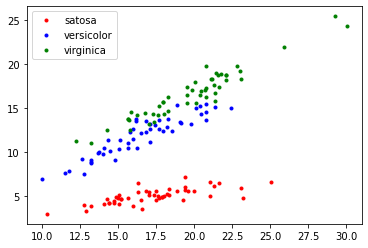

In [144]:
plt.plot(X[:, 0][y == 0]* X[:, 1][y == 0], X[:, 1][y == 0]* X[:, 2][y == 0], 'r.', label='satosa')
plt.plot(X[:, 0][y == 1]* X[:, 1][y == 1], X[:, 1][y == 1]* X[:, 2][y == 1], 'b.', label='versicolor')
plt.plot(X[:, 0][y == 2]* X[:, 1][y == 2], X[:, 1][y == 2]* X[:, 2][y == 2], 'g.', label='virginica')
plt.legend()
plt.show()

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [146]:
log_reg = LogisticRegression(C=1e5, max_iter=1000)

In [147]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=100000.0, max_iter=1000)

In [148]:
log_reg.score(X_test, y_test)

1.0